In [77]:
import csv
import numpy
import pandas as pd;
import warnings
warnings.filterwarnings("ignore")

In [78]:
df = pd.read_csv(r'prices-split-adjusted.csv')
df.apply(lambda x: sum(x.isnull()), axis=0)   # Checking for null values

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [79]:
symbol = df.symbol.unique()
execute = True
while execute:
    sym = input('Enter symbol of share?')         #Input stock name from user
    if sym in symbol:
        execute = False
    else:
        print("Enter a valid share symbol") 

Enter symbol of share?A


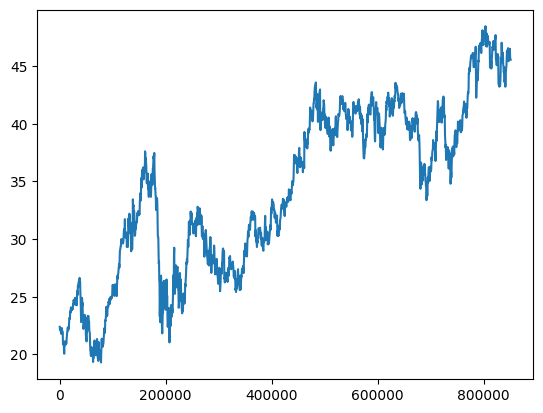

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
df1 = df[df.symbol.apply(lambda x:x==sym)] # Retrieving data of that particular share
plt.plot(df1.index,df1.close)

In [81]:
df2 = df1.loc[:,'open':] # Considering important columns
df2.head()

,open,close,low,high,volume
251,22.453504,22.389128,22.267525,22.625180,3815500.0
718,22.324749,22.145923,22.002861,22.331903,4186000.0
1186,22.067240,22.067240,22.002861,22.174536,3243700.0
1654,22.017168,22.038626,21.816881,22.045780,3095100.0
2122,21.917024,22.031474,21.745350,22.067240,3733900.0


In [82]:
days = 22                            # Creating features based on last 22 days of data
df3 = pd.DataFrame()
rows = df2.shape[0]
for i in range(1,rows-days):
    s = pd.Series()
    for j in range(i,i+days):
        s = s.append(df2.iloc[j,:])
    df4 = pd.DataFrame(s)
    df3 = df3.append(df4.transpose())
df3.head() 
df3 = df3.reset_index(drop=True)
df3.shape

(1739, 110)

In [83]:
y = pd.DataFrame()
y = df2.close[days+1:]
y = y.transpose()
y = y.reset_index(drop=True)
y.head()   

0    20.865522
1    20.886982
2    21.037195
3    20.922747
4    21.001431
Name: close, dtype: float64

In [84]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression(copy_X=True)         #  Using Linear Regression model
test_days = 30
train = df3.shape[0]-test_days
x_train = df3.iloc[0:train]            # Dividng training and tesing data
x_train.head() 

,open,close,low,high,volume,open,close,low,high,volume,...,open,close,low,high,volume,open,close,low,high,volume
0,22.324749,22.145923,22.002861,22.331903,4186000.0,22.067240,22.067240,22.002861,22.174536,3243700.0,...,21.022890,21.130186,21.001431,21.380543,6085600.0,20.958511,20.793991,20.701002,21.065809,6632300.0
1,22.067240,22.067240,22.002861,22.174536,3243700.0,22.017168,22.038626,21.816881,22.045780,3095100.0,...,20.958511,20.793991,20.701002,21.065809,6632300.0,20.679543,20.865522,20.157368,20.929899,9546600.0
2,22.017168,22.038626,21.816881,22.045780,3095100.0,21.917024,22.031474,21.745350,22.067240,3733900.0,...,20.679543,20.865522,20.157368,20.929899,9546600.0,20.894134,20.886982,20.836911,21.230330,6924100.0
3,21.917024,22.031474,21.745350,22.067240,3733900.0,22.088697,22.045780,21.938484,22.210300,4781500.0,...,20.894134,20.886982,20.836911,21.230330,6924100.0,21.123034,21.037195,20.872675,21.258941,5150600.0
4,22.088697,22.045780,21.938484,22.210300,4781500.0,21.859800,21.781117,21.616594,21.924177,2871000.0,...,21.123034,21.037195,20.872675,21.258941,5150600.0,21.072962,20.922747,20.658083,21.094421,3255500.0


In [85]:
y_train = y.iloc[0:train]
model.fit(x_train, y_train) # Fitting Linear Model

LinearRegression()

In [86]:
x_test = df3.iloc[train+1:]
y_test = pd.Series(model.predict(x_test))     # Predicting the Linear Model
y_actual = y.iloc[train+1:]
mean_squared_error(y_test,y_actual) #Mean Squared Error of Test Data

0.3733227054046413

In [87]:
[y_test] # Model Predicted Values

[0     45.997321
 1     45.425706
 2     45.068252
 3     44.412757
 4     44.617641
 5     44.857253
 6     43.680559
 7     44.528261
 8     44.142059
 9     43.198421
 10    43.798696
 11    44.378112
 12    44.608268
 13    44.584215
 14    46.111265
 15    46.054305
 16    46.124272
 17    46.250021
 18    46.030061
 19    46.740987
 20    45.654443
 21    45.553366
 22    46.214616
 23    46.212650
 24    46.281514
 25    46.226654
 26    46.714577
 27    45.671382
 28    45.496029
 dtype: float64]

In [88]:
y_actual=y_actual.reset_index(drop=True)
y_test= y_test.reset_index(drop=True)
y_actual.head()

0    45.040001
1    44.970001
2    44.459999
3    44.650002
4    44.889999
Name: close, dtype: float64

In [89]:
y_test.head() 

0    45.997321
1    45.425706
2    45.068252
3    44.412757
4    44.617641
dtype: float64

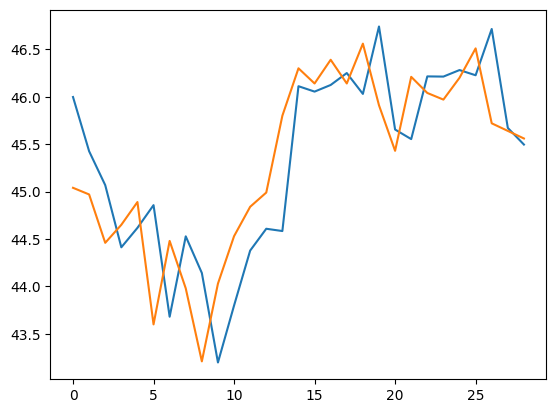

In [90]:
plt.plot(y_test)          # Comparing test predictions with actual data
plt.plot(y_actual)        # Blue - y_test and Orange - y_actual

In [91]:
r2_score(y_test,y_actual) #r2 score of model

0.5886962287590412

In [92]:
y_train_test = pd.Series(model.predict(x_train))
mean_squared_error(y_train,y_train_test)          #Mean Squared Error of Training Data


0.3230703902024001

In [93]:
r2_score(y_train,y_train_test)                   #r2_score of Training Data

0.9938642644428084

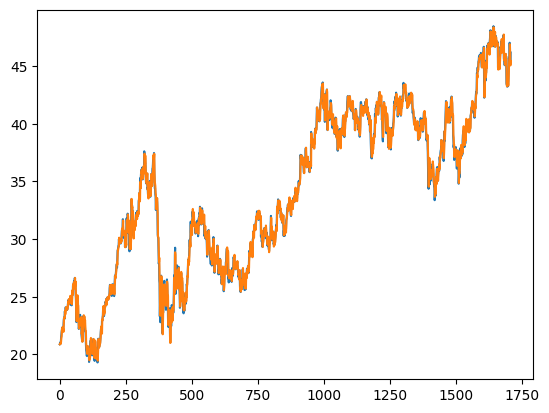

In [94]:
y_train = y_train.reset_index(drop=True)
y_train_test = y_train_test.reset_index(drop=True)
plt.plot(y_train)
plt.plot(y_train_test)            #Visualization of Predictions vs Actual Data

In [95]:
x_train_squared = x_train**2           # Making the training features squared for Ploynomial Regression 
x_poly_train = pd.concat([x_train, x_train_squared], axis=1)
x_poly_train = x_poly_train.reset_index(drop=True)
x_poly_train.head() # Features for polynomial regression model

,open,close,low,high,volume,open,close,low,high,volume,...,open,close,low,high,volume,open,close,low,high,volume
0,22.324749,22.145923,22.002861,22.331903,4186000.0,22.067240,22.067240,22.002861,22.174536,3243700.0,...,441.961897,446.484760,441.060088,457.127615,3.703453e+13,439.259202,432.390079,428.531490,443.768309,4.398740e+13
1,22.067240,22.067240,22.002861,22.174536,3243700.0,22.017168,22.038626,21.816881,22.045780,3095100.0,...,439.259202,432.390079,428.531490,443.768309,4.398740e+13,427.643495,435.370016,406.319471,438.060678,9.113757e+13
2,22.017168,22.038626,21.816881,22.045780,3095100.0,21.917024,22.031474,21.745350,22.067240,3733900.0,...,427.643495,435.370016,406.319471,438.060678,9.113757e+13,436.564856,436.266022,434.176843,450.726902,4.794316e+13
3,21.917024,22.031474,21.745350,22.067240,3733900.0,22.088697,22.045780,21.938484,22.210300,4781500.0,...,436.564856,436.266022,434.176843,450.726902,4.794316e+13,446.182549,442.563585,435.668572,451.942587,2.652868e+13
4,22.088697,22.045780,21.938484,22.210300,4781500.0,21.859800,21.781117,21.616594,21.924177,2871000.0,...,446.182549,442.563585,435.668572,451.942587,2.652868e+13,444.069731,437.761333,426.756392,444.974611,1.059828e+13


In [96]:
x_test_squared = x_test**2          # Making the test features squared for Ploynomial Regression
x_poly_test = pd.concat([x_test, x_test_squared], axis=1)
x_poly_test = x_poly_test.reset_index(drop=True)
x_poly_test.head() 

,open,close,low,high,volume,open,close,low,high,volume,...,open,close,low,high,volume,open,close,low,high,volume
0,45.410000,46.020000,45.340000,46.150002,1769000.0,46.000000,46.049999,45.650002,46.220001,1493600.0,...,2143.689907,2132.592400,2129.822685,2284.839904,1.621512e+13,2130.74560,2110.483508,2074.802409,2130.745600,4.287384e+12
1,46.000000,46.049999,45.650002,46.220001,1493600.0,45.669998,45.570000,45.290001,45.669998,1011300.0,...,2130.745600,2110.483508,2074.802409,2130.745600,4.287384e+12,2107.72810,2028.601690,2025.899920,2134.440092,9.913052e+12
2,45.669998,45.570000,45.290001,45.669998,1011300.0,45.880001,45.849998,45.639999,45.950001,1666400.0,...,2107.728100,2028.601690,2025.899920,2134.440092,9.913052e+12,2044.84849,2022.300990,1993.622679,2046.657781,6.452108e+12
3,45.880001,45.849998,45.639999,45.950001,1666400.0,45.259998,43.509998,43.169998,45.590000,3949500.0,...,2044.848490,2022.300990,1993.622679,2046.657781,6.452108e+12,2019.60351,1976.691511,1915.812900,2039.425600,8.015693e+12
4,45.259998,43.509998,43.169998,45.590000,3949500.0,43.419998,43.369999,43.240002,43.820000,2146200.0,...,2019.603510,1976.691511,1915.812900,2039.425600,8.015693e+12,1951.87240,1993.622679,1933.360988,2005.248310,3.710632e+12


In [97]:
poly_model = linear_model.LinearRegression(copy_X=True)  
poly_model.fit(x_poly_train, y_train)                # Fitting a Polynomial Regression Model with Squared Features

LinearRegression()

In [98]:
y_poly_predict = pd.Series(poly_model.predict(x_poly_test))
mean_squared_error(y_poly_predict,y_actual) #Mean Squared Error of Polynomial Regression Model

0.7420148588132562

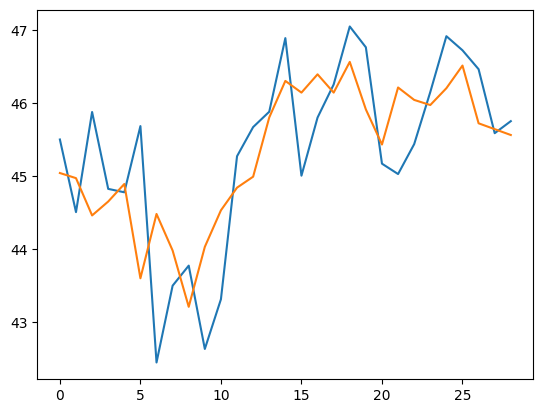

In [99]:
plt.plot(y_poly_predict)      #Comparing test predictions with actual data 
plt.plot(y_actual)            # Blue - y_test and Orange - y_actual

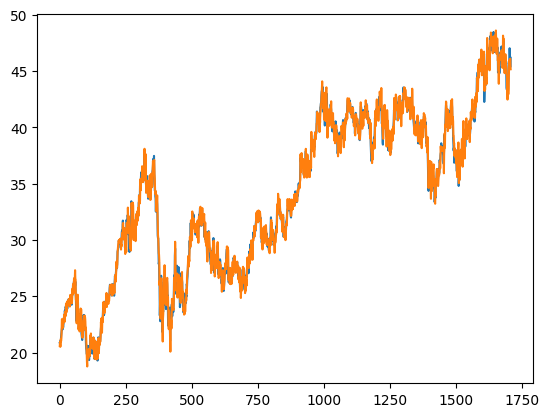

In [100]:
y_poly_train_predict = poly_model.predict(x_poly_train)
plt.plot(y_train)
plt.plot(y_poly_train_predict) # Overfitting visualization